##  CIFAR10 IMAGE DATASET CLASSIFICATION USING ANN AND CNN

CIFAR-10 is a widely used dataset in the field of machine learning and computer vision. It stands for the Canadian Institute for Advanced Research, which sponsored the dataset. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The classes are:

Airplane.

Automobile.

Bird.

Cat.

Deer.

Dog.

Frog.

Horse.

Ship.

Truck.

CIFAR-10 is commonly used for benchmarking machine learning algorithms, particularly for image classification tasks. Due to its relatively small size and diversity of classes, it's often used for educational purposes and as a starting point for testing and prototyping machine learning models. Additionally, there is an extended version called CIFAR-100, which has 100 classes containing 600 images each.

In [79]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Loading dataset from datasets from tensorflow keras api
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [18]:
y_train[:5] ## for getting first 5 values

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [47]:
## converting target variable into 1D list from 2D list
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [48]:
## Classes present in CIFAR!) dataset
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [49]:
classes[0]

'airplane'

In [54]:
## Function to plot desired image
def plot_data(x , y , index):
    plt.figure(figsize= (2,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

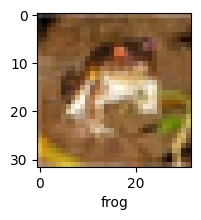

In [55]:
plot_data(x_train , y_train , 0)

#### Standardization

In [56]:
x_train = x_train / 255
x_test = x_test / 255

### Basic Artificial neural network

In [59]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000 , activation = 'relu'),
    layers.Dense(1000 , activation = 'relu'),
    layers.Dense(10 , activation = 'sigmoid'),
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.summary()

ann.fit(x_train,y_train, epochs = 5)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3000)                │       9,219,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1000)                │       3,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,230,010 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 63ms/step - accuracy: 0.3035 - loss: 1.9351
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.4226 - loss: 1.6341
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4518 - loss: 1.5570
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4784 - loss: 1.4788
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4926 - loss: 1.4393


### Clssification Report

In [62]:
from sklearn.metrics import classification_report 
import numpy as np

y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

print("classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
classification Report : 
               precision    recall  f1-score   support

           0       0.61      0.46      0.53      1000
           1       0.72      0.50      0.59      1000
           2       0.33      0.44      0.38      1000
           3       0.38      0.16      0.23      1000
           4       0.47      0.36      0.41      1000
           5       0.30      0.60      0.40      1000
           6       0.54      0.52      0.53      1000
           7       0.58      0.52      0.55      1000
           8       0.57      0.68      0.62      1000
           9       0.57      0.58      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



### Basic Convolutional Neural Network

In [68]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32 ,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64 ,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(10 , activation = 'softmax'),
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnn.summary()

cnn.fit(x_train,y_train, epochs = 5)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.3793 - loss: 1.7127
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6047 - loss: 1.1304
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6580 - loss: 0.9769
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6868 - loss: 0.9012
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7155 - loss: 0.8262


In [69]:
cnn.fit(x_train, y_train , epochs = 10, initial_epoch = 5)

Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7346 - loss: 0.7616
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7502 - loss: 0.7185
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7643 - loss: 0.6712
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7768 - loss: 0.6418
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7939 - loss: 0.5929


In [70]:
cnn.fit(x_train, y_train , epochs = 15, initial_epoch = 10)

Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8055 - loss: 0.5518
Epoch 12/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8159 - loss: 0.5251
Epoch 13/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8250 - loss: 0.4946
Epoch 14/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8352 - loss: 0.4652
Epoch 15/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8477 - loss: 0.4314


In [71]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6981 - loss: 1.0465


[1.065528392791748, 0.6969000101089478]

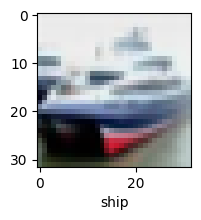

In [72]:
plot_data(x_test , y_test , 1)

In [75]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


### Classification Report 

In [76]:
y_pred_classes = [np.argmax(i) for i in y_pred]

print("classification Report : \n", classification_report(y_test, y_pred_classes))

classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.84      0.76      0.80      1000
           2       0.65      0.52      0.58      1000
           3       0.59      0.42      0.49      1000
           4       0.67      0.65      0.66      1000
           5       0.58      0.67      0.62      1000
           6       0.76      0.79      0.77      1000
           7       0.74      0.72      0.73      1000
           8       0.73      0.85      0.78      1000
           9       0.71      0.83      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [78]:
classes[y_pred_classes[1]]

'ship'